<a href="https://colab.research.google.com/github/catchnehal/catchnehal/blob/main/Food_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from geopy.distance import geodesic


Data Acquisition.
Link to the dataset on kaggle - https://www.kaggle.com/code/gauravmalik26/food-delivery

In [ ]:
master_df=pd.read_csv('/content/FOOD_DELIVERY_TRAIN.csv')
master_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
#Understanding and describing the data

master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          11399 non-null  object 
 3   Delivery_person_Ratings      11399 non-null  object 
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  11399 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weatherconditions            11399 non-null  object 
 12  Road_traffic_density         11399 non-null  object 
 13  Vehicle_conditio

We have 19 columns and 45,593 rows in the original dataset.
Describing columns that are not obviously named:
ID: Order ID.

Vehicle_condition: 0 means very good, 3 means very bad.

Type_of_order: Snack, Drinks, Buffet or Meal.

multiple_deliveries: How many deliveries have to be made in one trip.

In [ ]:
# Checking for null values in the unmodified dataset

master_df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
dtype: int64

We see that all rows and columns are filled in the unmodified dataset.
But there might still exist null values in wrong formats.

**Data Pre-Processing**

*Data Cleaning*

In [ ]:
# Finding all types of null values, storing in set null_types

master_df = master_df.astype(str) # converting dataframe to string

null_types = set()

for column in master_df.columns:
  unique_vals = master_df[column].unique()
  for val in unique_vals:
    if 'nan' in val.lower():
      null_types.add(val)

print(null_types)

{'NaN ', 'conditions NaN'}


In [ ]:
# Correcting null values to np.nan

for na_value in null_types:
  master_df.replace(na_value, np.nan, inplace = True)

In [ ]:
# Counting null values again

master_df.isna().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions              158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
dtype: int64

In [ ]:
# removing whitespaces from either sides

master_df = master_df.apply(lambda x: x.str.strip())
master_df.drop(columns= master_df.columns[0], inplace = True)

In [ ]:
# Data imputation using KNN-Imputer
"""
from sklearn.impute import KNNImputer

imputer = KNNImputer()
master_df['Delivery_person_Ratings'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]
master_df['Delivery_person_Age'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]"""

"\nfrom sklearn.impute import KNNImputer\n\nimputer = KNNImputer()\nmaster_df['Delivery_person_Ratings'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]\nmaster_df['Delivery_person_Age'] = imputer.fit_transform([master_df['Delivery_person_Ratings']])[0]"

In [ ]:
# Dropping rows containing null values

master_df.dropna(inplace = True)

**Data Wrangling**

In [ ]:
master_df['Weatherconditions'] = master_df['Weatherconditions'].str.split(" ", expand=True)[1]

master_df['Time_taken(min)'] = master_df['Time_taken(min)'].str.split(" ", expand=True)[1]

In [ ]:
# Converting columns to correct data-type

num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude',
            'Delivery_location_latitude','Delivery_location_longitude','Vehicle_condition',
            'multiple_deliveries','Time_taken(min)']

## Converting numerical columns to float
for col in num_cols:
    master_df[col] = master_df[col].astype('float64')
    
## Converting Order_Date column to datetime date format
master_df['Order_Date'] = pd.to_datetime(master_df['Order_Date'], format = "%d-%m-%Y")

In [ ]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lab = le.fit_transform(master_df['Delivery_person_ID'])

In [ ]:
# one hot encoding
encoded_df = master_df.copy()

encoded_df = pd.get_dummies(encoded_df ,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                                  'Type_of_vehicle', 'City'])
encoded_df = pd.get_dummies(encoded_df ,columns = ['Festival'], drop_first=True)

*Adding useful features*

In [ ]:
# Computing distance from restaurant to delivery location using lat and long and making a new column named 'distance_km'

# creating new column filled with zeroes
master_df['distance_km'] = np.zeros(master_df.shape[0])

restaurant_cordinates = master_df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates = master_df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

# calculating and filling in distance
for i in range(master_df.shape[0]):
    master_df['distance_km'].loc[i] = geodesic(restaurant_cordinates[i], delivery_location_cordinates[i]).km

# Dropping lat long columns
master_df = master_df.drop(columns = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'] )

<ipython-input-38-bc78b731d585>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['distance_km'].loc[i] = geodesic(restaurant_cordinates[i], delivery_location_cordinates[i]).km


In [ ]:
# Cleaning column 'distance_km'

# Converting to string to remove ' km'
master_df['distance_km'] = master_df['distance_km'].astype(str).str[:-3].replace('',0)

# Converting to float and rounding off
master_df['distance_km'] = master_df['distance_km'].astype(float).round(2)

In [ ]:
# We check for anomalous distance values

threshold_dist = 25
print(f"Number of deliveries with distance more than {threshold_dist} km =",
      master_df[master_df['distance_km'] > 25]['distance_km'].count())

print(f"Number of deliveries with distance 0 =",
      master_df[master_df['distance_km'] == 0]['distance_km'].count())

Number of deliveries with distance more than 25 km = 431
Number of deliveries with distance 0 = 0


In [ ]:
# Dropping entries with distance equal to 0 or more than 25

# index of rows that have distance equal to 0 or greater than 25 km
index_to_drop = master_df[(master_df['distance_km'] == 0) | (master_df['distance_km'] > 25)].index

master_df.drop(index_to_drop, inplace = True)

In [ ]:
# Adding column for avg_speed

master_df['avg_speed_kmph'] = round(master_df['distance_km']*60 / master_df['Time_taken(min)'])

*Exploratory Data Analysis*

In [ ]:
# Doing EDA on a copy of the master dataframe

edal_df = master_df.copy()

<ipython-input-44-b1816957054d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edal_df.corr(), annot=True, linewidth=0.1)


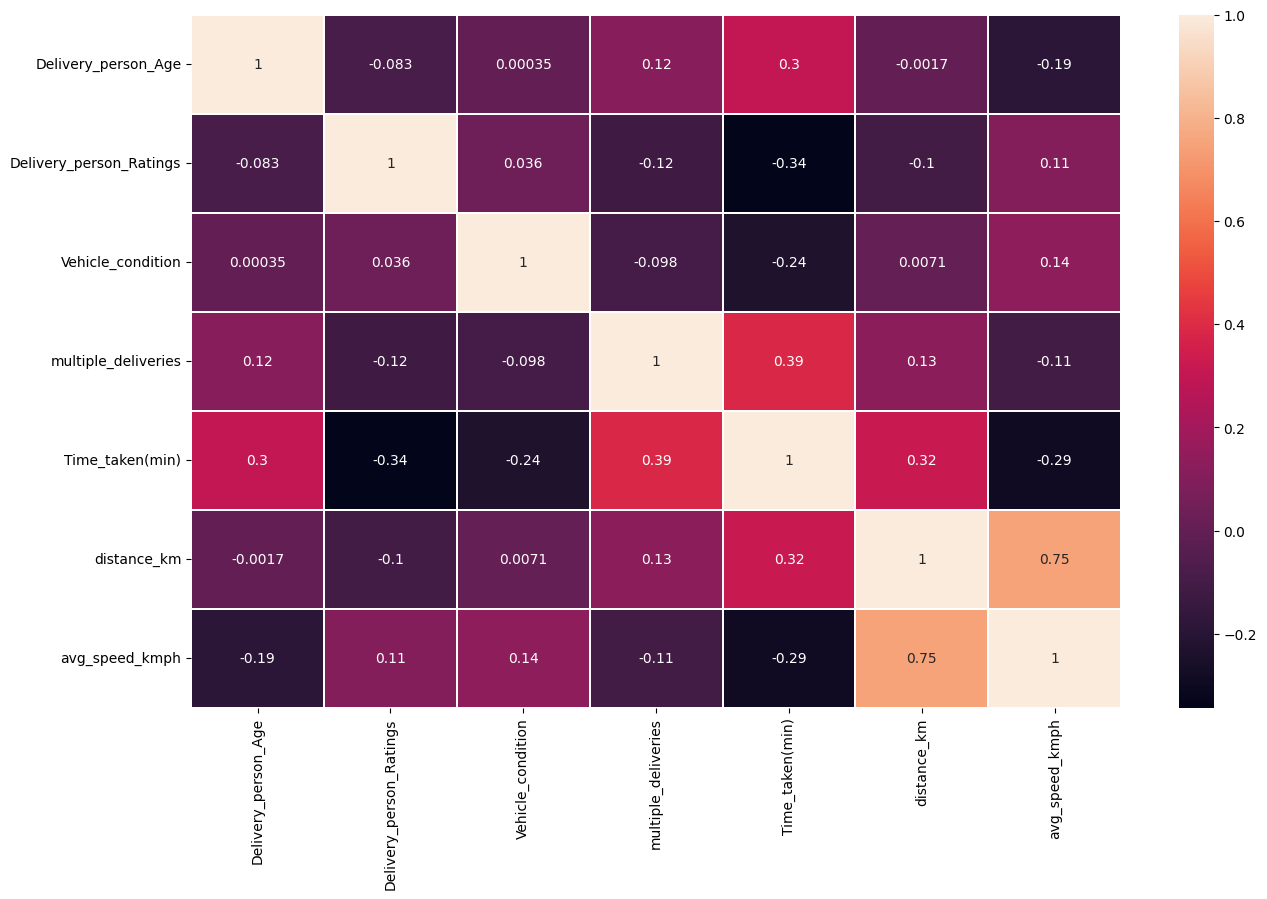

In [ ]:
# Correlation HeatMap

plt.figure(figsize=(15,9))

sns.heatmap(edal_df.corr(), annot=True, linewidth=0.1)
plt.show()

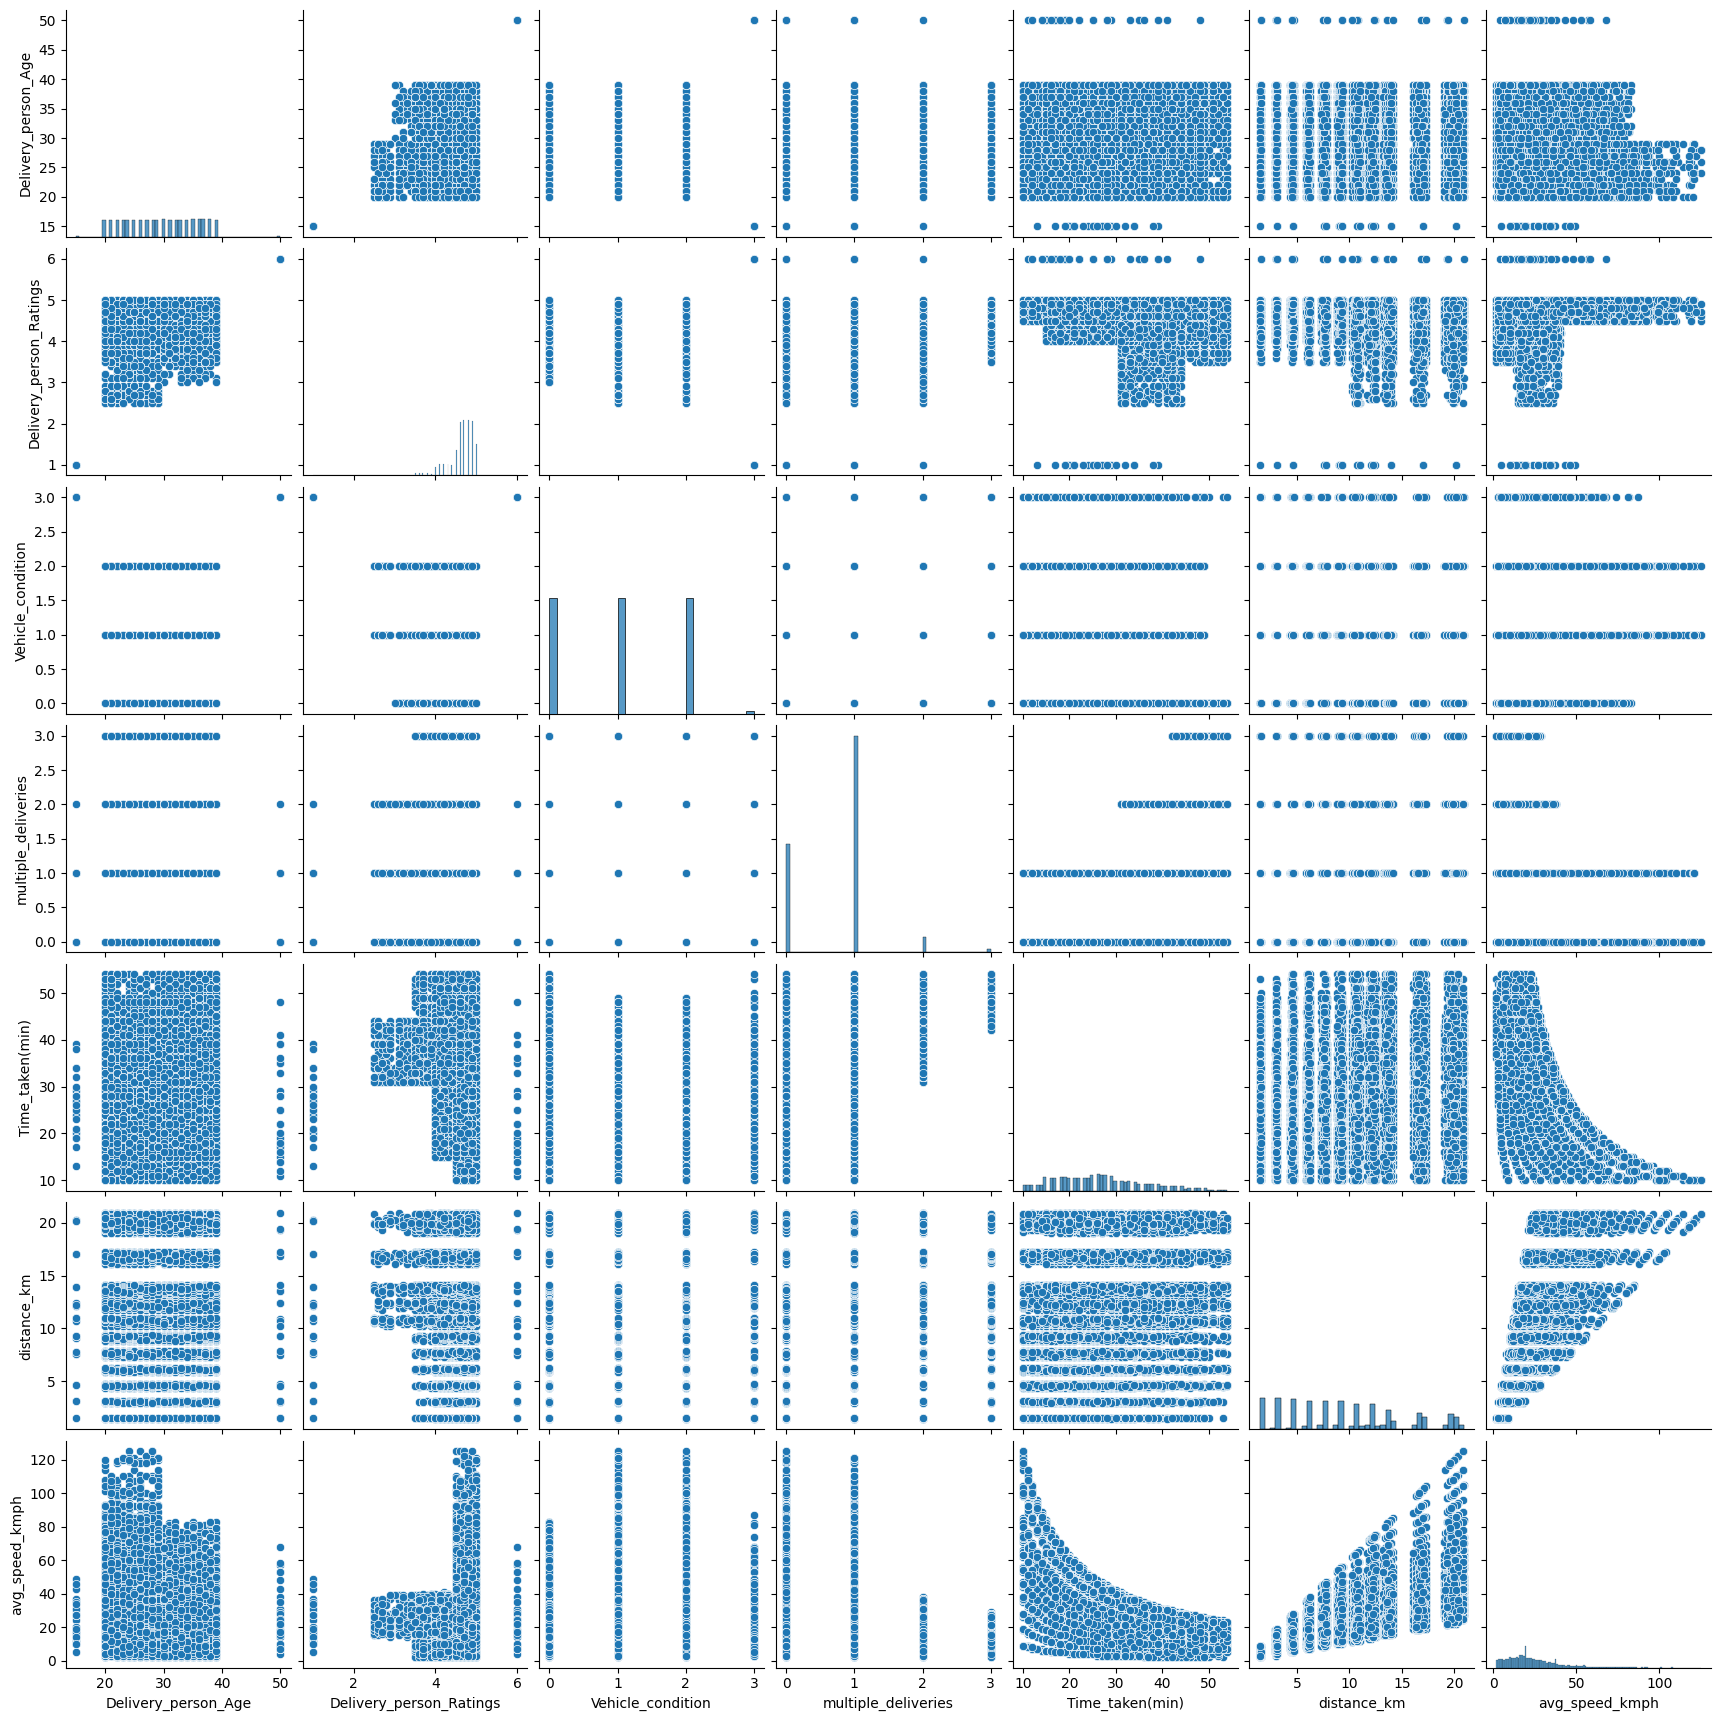

In [ ]:
# Pair Plots

sns.pairplot(edal_df)

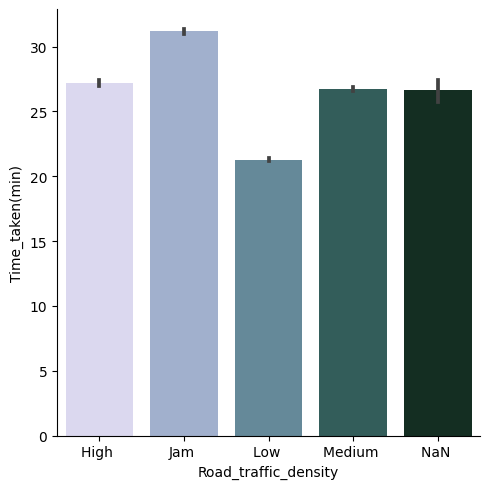

In [ ]:
sns.catplot(x="Road_traffic_density", 
            y="Time_taken(min)",
            kind="bar",
            palette="ch:5", 
            data=edal_df)

In [ ]:
# Age v/s Delivery Time (Weatherwise)

fig=px.line(edal_df.sort_values(by='Delivery_person_Age'),
            x='Delivery_person_Age',
            y='Time_taken(min)',
            animation_frame='Weatherconditions',
            animation_group='Delivery_person_Age',
            color='Weatherconditions',
            markers=True,
            template='plotly_dark',
            title='Driver Age vs Delivery Time (Weatherwise)')

fig.update_traces(showlegend=False)

In [ ]:
# Difference between average speeds of under 30 and over 30 drivers

under_30 = edal_df[ edal_df['Delivery_person_Age'] < 30]['avg_speed_kmph'].mean()
above_30 = edal_df[ edal_df['Delivery_person_Age'] >= 30]['avg_speed_kmph'].mean()

print(f'Average speed of persons under 30: {round(under_30,2)} kmph')
print(f'Average speed of persons above 30: {round(above_30,2)} kmph')

Average speed of persons under 30: 27.25 kmph
Average speed of persons above 30: 20.41 kmph


*Insight 2: The average delivery speed of delivery persons under the age of 30 is about 25% more than of those above the age of 30*

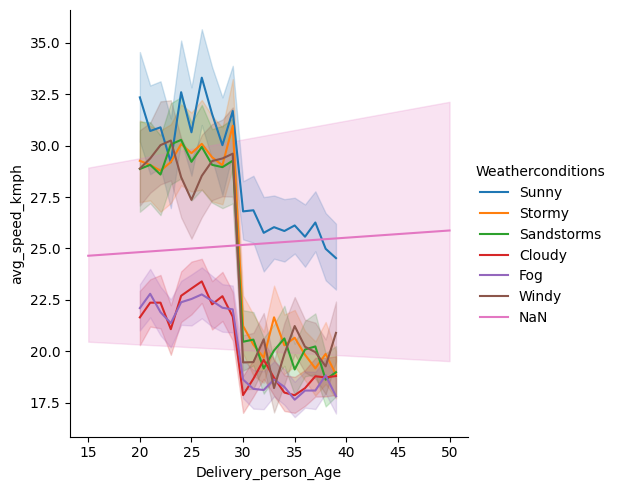

In [ ]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Weatherconditions',kind = 'line')

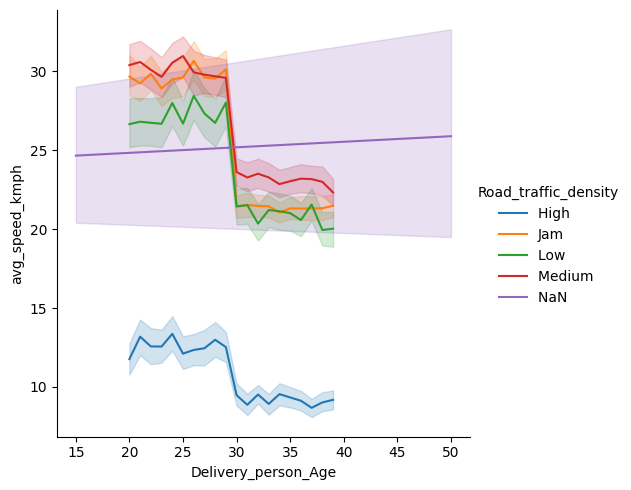

In [ ]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

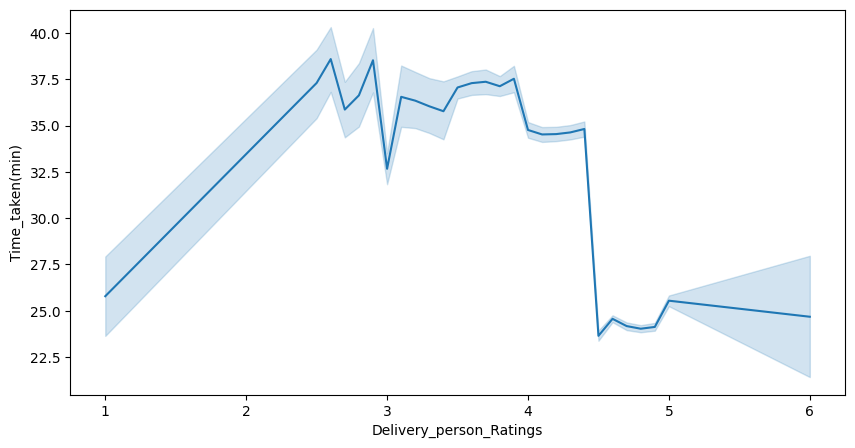

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="Time_taken(min)", data=edal_df)
plt.show()

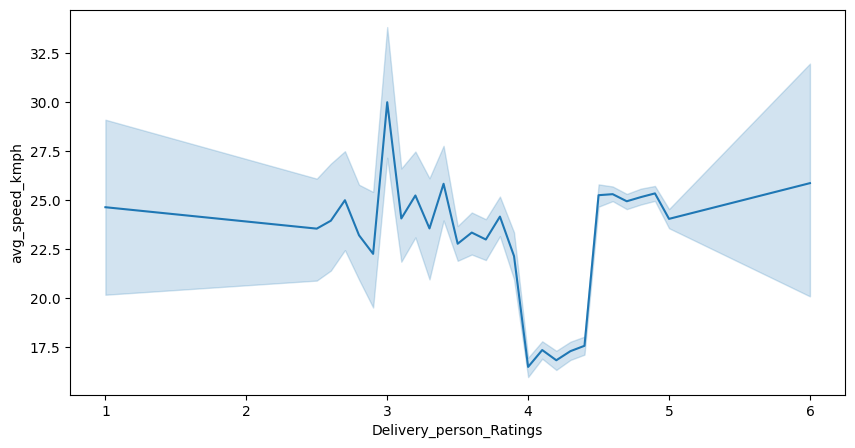

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="avg_speed_kmph", data=edal_df)
plt.show()

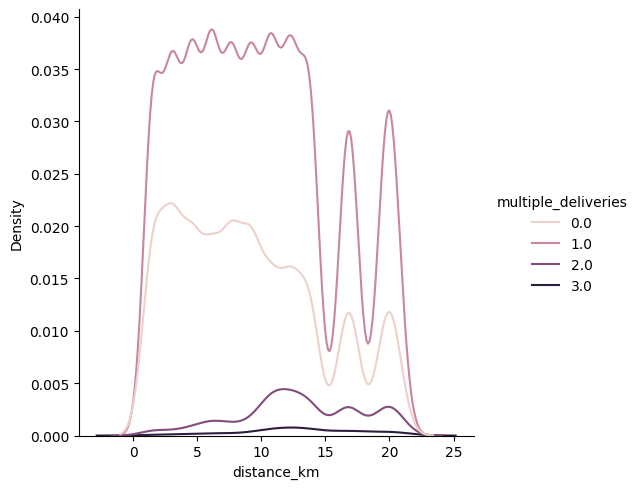

In [ ]:
sns.displot(hue='multiple_deliveries',data=edal_df,kind='kde', x = 'distance_km')

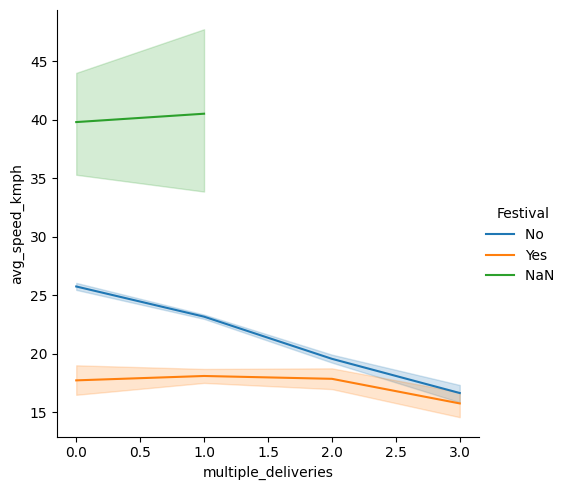

In [ ]:
sns.relplot(data = edal_df, x = 'multiple_deliveries', y = 'avg_speed_kmph',hue='Festival',kind = 'line')

In [ ]:
#  Sunny vs Storms vs Winds/Fog

edal_df[edal_df['Weatherconditions'] == 'Sunny']['avg_speed_kmph'].mean()

28.553882287924843

In [ ]:
edal_storms = edal_df.loc[(edal_df['Weatherconditions'] == 'Stormy') | (edal_df['Weatherconditions'] == 'Sandstorms')]
print(edal_storms['Weatherconditions'].unique())
edal_storms['avg_speed_kmph'].mean()

['Stormy' 'Sandstorms']


24.65868143600694

In [ ]:
edal_not_storms = edal_df.loc[(edal_df['Weatherconditions'] != 'Stormy') & (edal_df['Weatherconditions'] != 'Sandstorms')
                                 & (edal_df['Weatherconditions'] != 'Sunny')]
print(edal_not_storms['Weatherconditions'].unique())
edal_not_storms['avg_speed_kmph'].mean() 

['Cloudy' 'Fog' 'Windy' 'NaN']


21.740169151626123

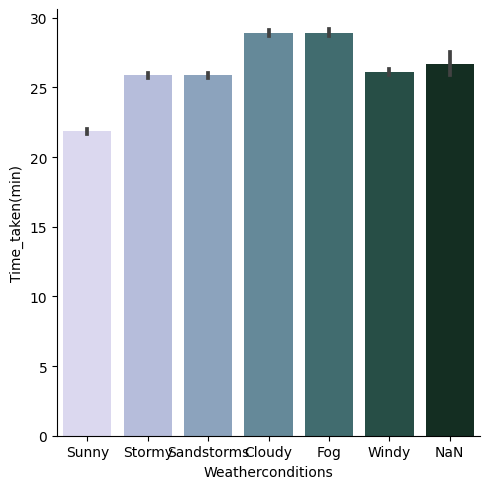

In [ ]:
# Catplot: Delivery Time v/s Weather Conditions

sns.catplot(data=edal_df, x="Weatherconditions", y="Time_taken(min)", kind="bar", palette="ch: 5",)

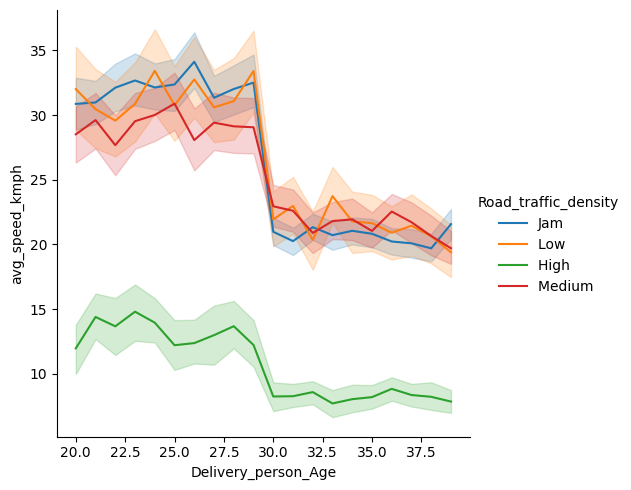

In [ ]:
sns.relplot(data = edal_storms, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

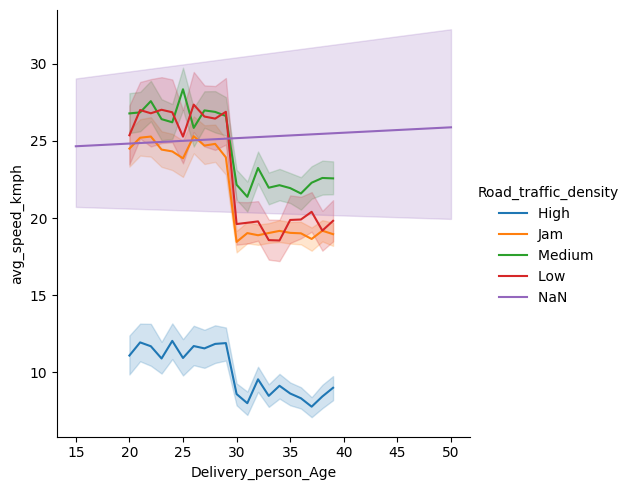

In [ ]:
sns.relplot(data = edal_not_storms, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

**PDSL**

In [ ]:
pdsl_df = master_df.copy()
pdsl_df = pdsl_df.drop(columns = ['ID', 'Delivery_person_ID','Order_Date'] )
pdsl_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,avg_speed_kmph
0,37.0,4.9,11:30:00,11:45:00,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24.0,3.02,8.0
1,34.0,4.5,19:45:00,19:50:00,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33.0,20.14,37.0
2,23.0,4.4,08:30:00,08:45:00,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26.0,1.55,4.0
3,38.0,4.7,18:00:00,18:10:00,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.77,22.0
4,32.0,4.6,13:30:00,13:45:00,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30.0,6.20,12.0


In [ ]:
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Time_taken(min)']
for col in num_cols:
    pdsl_df[col]=pdsl_df[col].astype('float64')

In [ ]:
# 0 -- bad, 1 - good, 2-better, 3-best -- vehicle condition

In [ ]:
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                          'Type_of_vehicle', 'City'])
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Festival'], drop_first=True)

In [ ]:
features = pdsl_df.drop('Time_taken(min)', axis =1)
label = pdsl_df['Time_taken(min)'].copy()

In [ ]:
features

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Vehicle_condition,multiple_deliveries,distance_km,avg_speed_kmph,Weatherconditions_Cloudy,Weatherconditions_Fog,...,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_NaN,City_Semi-Urban,City_Urban,Festival_No,Festival_Yes
0,37.0,4.9,11:30:00,11:45:00,2.0,0.0,3.02,8.0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,34.0,4.5,19:45:00,19:50:00,2.0,1.0,20.14,37.0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,23.0,4.4,08:30:00,08:45:00,0.0,1.0,1.55,4.0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,38.0,4.7,18:00:00,18:10:00,0.0,1.0,7.77,22.0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,32.0,4.6,13:30:00,13:45:00,1.0,1.0,6.20,12.0,1,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30.0,4.8,11:35:00,11:45:00,1.0,0.0,1.49,3.0,0,0,...,0,0,1,0,1,0,0,0,1,0
45589,21.0,4.6,19:55:00,20:10:00,0.0,1.0,10.98,18.0,0,0,...,0,0,1,0,1,0,0,0,1,0
45590,30.0,4.9,23:50:00,00:05:00,1.0,0.0,4.65,17.0,1,0,...,0,0,0,1,1,0,0,0,1,0
45591,20.0,4.7,13:35:00,13:40:00,0.0,1.0,6.22,14.0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
features = features.drop(['Time_Orderd'],axis=1)

In [ ]:
features = features.drop(['Time_Order_picked'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
features=features.fillna(0)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31613, 32) (13549, 32) (31613,) (13549,)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt


In [ ]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()

In [ ]:
models = {'Linear Regression':model_lr, 'Random Forest Regression': model_rf, 'Gradient Boosting Regressor':model_gbr, 
          'Decision Tree Regressor': model_dtr}


In [ ]:
x_train

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,distance_km,avg_speed_kmph,Weatherconditions_Cloudy,Weatherconditions_Fog,Weatherconditions_NaN,Weatherconditions_Sandstorms,...,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_NaN,City_Semi-Urban,City_Urban,Festival_No,Festival_Yes
28611,20.0,4.9,2.0,1.0,16.87,84.0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
5542,32.0,4.7,0.0,1.0,12.06,18.0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
36357,28.0,4.7,0.0,1.0,10.69,29.0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4750,30.0,4.6,2.0,1.0,7.75,20.0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
6410,28.0,4.9,1.0,0.0,3.05,12.0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11412,38.0,4.9,0.0,1.0,4.65,8.0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
45161,0.0,0.0,0.0,0.0,20.14,71.0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
38526,39.0,4.6,2.0,1.0,5.95,11.0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
867,34.0,4.8,1.0,1.0,3.10,11.0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0


In [ ]:
for i in models.keys():
  print(i)
  models[i].fit(x_train,  y_train)
  y_pred = models[i].predict(x_test)
  print("Accuracy in training dataset: ", (models[i].score(x_train, y_train)*100))
  print("Accuracy in testing dataset: ", models[i].score(x_test, y_test)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
  print('--------------------------------------')

Linear Regression
Accuracy in training dataset:  81.76110685624658
Accuracy in testing dataset:  81.54473060743781
RMSE value:  4.066820321660385
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.8503660603523
Accuracy in testing dataset:  98.93239030679494
RMSE value:  0.9781400571527404
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  95.72871846100975
Accuracy in testing dataset:  95.60490364341096
RMSE value:  1.9846274364325325
--------------------------------------
Decision Tree Regressor
Accuracy in training dataset:  99.99925788318878
Accuracy in testing dataset:  97.95683386142477
RMSE value:  1.353152149441434
--------------------------------------


In [ ]:
#Hence the best model is Random Forest Regressor
# lowest rmse and highest acc on testing data
print('Random Forest Regression')
print("Accuracy in training dataset: ", (model_rf.score(x_train, y_train)*100))
print("Accuracy in testing dataset: ", model_rf.score(x_test, y_test)*100)
print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
y_pred=model_rf.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=pdsl_df.copy().merge(out,left_index=True,right_index=True)
out[['Delivery_person_Ratings','actual','predicted']].sample(10)

Random Forest Regression
Accuracy in training dataset:  99.8503660603523
Accuracy in testing dataset:  98.93239030679494
RMSE value:  1.353152149441434


,Delivery_person_Ratings,actual,predicted
12993,4.5,17.0,17.74
37063,3.8,44.0,43.13
10251,4.9,39.0,38.15
24922,4.3,38.0,35.13
37043,4.6,25.0,24.96
34760,5.0,19.0,19.06
28770,4.9,19.0,18.98
18407,4.0,27.0,26.41
40237,4.9,15.0,15.00
3450,5.0,19.0,19.12


*Time taken by drivers with rating 4+ on festival and non-festival days*

<Axes: xlabel='Festival', ylabel='Time_taken(min)'>

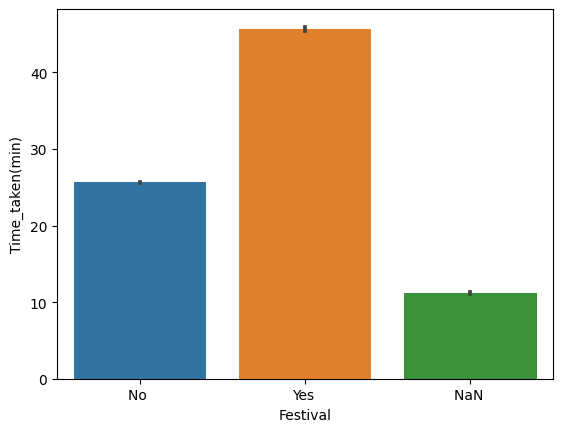

In [ ]:
rating_4_plus = master_df[master_df['Delivery_person_Ratings'] >= 4]

sns.barplot(x = 'Festival', y = 'Time_taken(min)', data = rating_4_plus)

In [ ]:
rating_4_plus[ rating_4_plus['Festival'] == 'Yes']['Time_taken(min)'].mean()

nan

In [ ]:
rating_4_plus[ rating_4_plus['Festival'] == 'No']['Time_taken(min)'].mean()

nan